In [17]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn


[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.6/294.6 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
from modules import *

## Load data and take initial view

In [10]:
data = encodeDataFrame(loadDataFrame('./original_data/list_attr_celeba.csv'));

print(data.head());

   image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0         0                 0                1           1                0   
1         1                 0                0           0                1   
2         2                 0                0           0                0   
3         3                 0                0           1                0   
4         4                 0                1           1                0   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0     0      0         0         0           0  ...          0        1   
1     0      0         0         1           0  ...          0        1   
2     0      0         1         0           0  ...          0        0   
3     0      0         0         0           0  ...          0        0   
4     0      0         1         0           0  ...          0        0   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipsti

In [16]:
print(data.describe());

            image_id  5_o_Clock_Shadow  Arched_Eyebrows     Attractive  \
count  202599.000000     202599.000000    202599.000000  202599.000000   
mean   101299.000000          0.111136         0.266981       0.512505   
std     58485.437931          0.314301         0.442383       0.499845   
min         0.000000          0.000000         0.000000       0.000000   
25%     50649.500000          0.000000         0.000000       0.000000   
50%    101299.000000          0.000000         0.000000       1.000000   
75%    151948.500000          0.000000         1.000000       1.000000   
max    202598.000000          1.000000         1.000000       1.000000   

       Bags_Under_Eyes           Bald          Bangs       Big_Lips  \
count    202599.000000  202599.000000  202599.000000  202599.000000   
mean          0.204572       0.022443       0.151575       0.240796   
std           0.403389       0.148121       0.358610       0.427568   
min           0.000000       0.000000       0.000

## Correlation between features

In [3]:
data.corr().style.background_gradient(cmap = "magma")

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,1.000000,-0.003415,0.005369,-0.003684,0.002559,-0.001205,-0.001072,0.009257,-0.005241,0.001812,-0.004341,-0.005173,0.002742,-0.007205,0.000112,0.002113,0.002317,-0.004282,-0.003877,0.007207,0.010496,-0.008430,0.005866,0.005981,-0.000940,0.003674,0.004700,-0.000890,0.006848,0.000926,0.008342,0.000104,0.009661,-0.001049,0.002903,0.009074,-0.005425,0.011402,0.007482,-0.002719,-0.018252
5_o_Clock_Shadow,-0.003415,1.000000,-0.158587,-0.062415,0.168488,0.005584,-0.089243,-0.043699,0.152010,0.100604,-0.132686,-0.033370,-0.012294,0.217964,-0.010260,0.002811,0.007306,0.143860,-0.043832,-0.280585,-0.160536,0.417670,-0.066493,0.092123,0.011282,-0.526946,-0.085337,-0.040279,-0.024305,-0.022273,-0.090107,0.259370,-0.067777,0.052260,-0.124250,-0.161911,0.033997,-0.333921,-0.116239,0.097899,0.014869
Arched_Eyebrows,0.005369,-0.158587,1.000000,0.250599,-0.091947,-0.069524,-0.027775,0.243400,-0.084025,-0.000996,0.127009,-0.075948,0.017850,-0.018046,-0.089423,-0.078133,-0.148923,-0.112795,-0.099181,0.439645,0.156242,-0.408016,0.066923,-0.086341,0.024175,0.202724,-0.013440,0.047715,0.153057,-0.016768,0.224422,-0.116001,0.093834,-0.054486,0.200835,0.294779,-0.099980,0.460409,0.220184,-0.132821,0.146798
Attractive,-0.003684,-0.062415,0.250599,1.000000,-0.178464,-0.145826,0.059712,0.062552,-0.277064,0.004140,0.154774,-0.180969,0.132069,0.042283,-0.236877,-0.208981,-0.222701,-0.146613,-0.201796,0.477084,0.149095,-0.394451,0.021465,-0.140182,-0.073882,0.197655,0.193939,0.086051,0.228292,-0.178677,0.163867,-0.100229,0.147845,0.041550,0.214992,0.124349,-0.138636,0.480104,0.068738,-0.156420,0.387735
Bags_Under_Eyes,0.002559,0.168488,-0.091947,-0.178464,1.000000,0.116215,-0.057568,-0.005982,0.361604,0.002667,-0.106879,-0.032765,-0.046492,0.107066,0.157286,0.196207,-0.042397,0.095434,0.171652,-0.293319,0.072873,0.301077,0.058761,0.109952,0.106856,-0.146539,-0.135912,-0.032892,-0.113986,0.117032,-0.093963,0.100411,0.112759,0.024208,-0.127128,-0.096969,-0.005726,-0.284052,-0.052964,0.196980,-0.230759
Bald,-0.001205,0.005584,-0.069524,-0.145826,0.116215,1.000000,-0.064044,-0.003577,0.180148,-0.080364,-0.063056,-0.009315,-0.076741,-0.020176,0.223647,0.212874,0.109383,0.115220,0.151304,-0.120235,-0.002277,0.178101,-0.000477,0.079672,0.012362,-0.115658,0.010788,-0.023222,-0.055636,0.140236,-0.037363,0.058599,0.009402,-0.071920,-0.103482,-0.061211,-0.030625,-0.142852,-0.050445,0.176501,-0.196253
Bangs,-0.001072,-0.089243,-0.027775,0.059712,-0.057568,-0.064044,1.000000,0.034876,-0.069395,-0.033558,0.098854,-0.009083,0.069450,-0.072552,-0.084137,-0.069531,-0.059005,-0.085602,-0.061601,0.120416,0.052970,-0.163264,0.009486,-0.067445,0.013018,0.132429,0.001626,0.042170,0.010973,-0.124249,0.060977,-0.073341,0.052469,0.020034,0.068166,0.058203,-0.079939,0.163378,0.114454,-0.092919,0.017695
Big_Lips,0.009257,-0.043699,0.243400,0.062552,-0.005982,-0.003577,0.034876,1.000000,0.076814,0.067191,0.023674,-0.037086,-0.015361,0.020804,0.007811,-0.009559,-0.050522,0.019088,-0.088191,0.146551,0.045165,-0.167472,0.048973,0.031484,0.113577,0.022777,-0.112263,0.039337,0.052646,0.020963,0.076767,-0.039739,0.012885,-0.037144,0.120190,0.126523,-0.013286,0.195212,0.149892,-0.067770,0.107722
Big_Nose,-0.005241,0.152010,-0.084025,-0.277064,0.361604,0.180148,-0.069395,0.076814,1.000000,0.081091,-0.158323,-0.037710,-0.133210,0.141162,0.314317,0.298426,0.139555,0.194172,0.195750,-0.278479,0.058757,0.369275,0.059408,0.207882,0.070165,-0.253800,-0.105909,-0.051177,-0.158633,0.202427,-0.055323,0.131667,0.100888,-0.02883

Here, we can see there is a correlation between being a "Male" (0.417670) and having a 5 o'clock shadown (0.41670). Equally, there is another correlation between being a "Male" (0.369275) and having a big nose. There is another correlation between being "Attractive" and "Wearing Makeup" (0.477084), and "Wearing Lipstick" (0.480104). There is another correlation between being "Attractive" and being "Young" (0.387735) which could affect our model as both classes are being selected. Finally, looking at our last choice "Smiling", there is a strong correlation with "High Cheeckbones" (0.683497) and "Mouth Slightly Open" (0.536379). This would have had to be taken into consideration when balancing the data in each class if we were using the tabular data. However, as we are using images, this will not have such an impact. Nevertheless, we need to consider the link between being "Attractive" and being "Young" as those classes are used. 

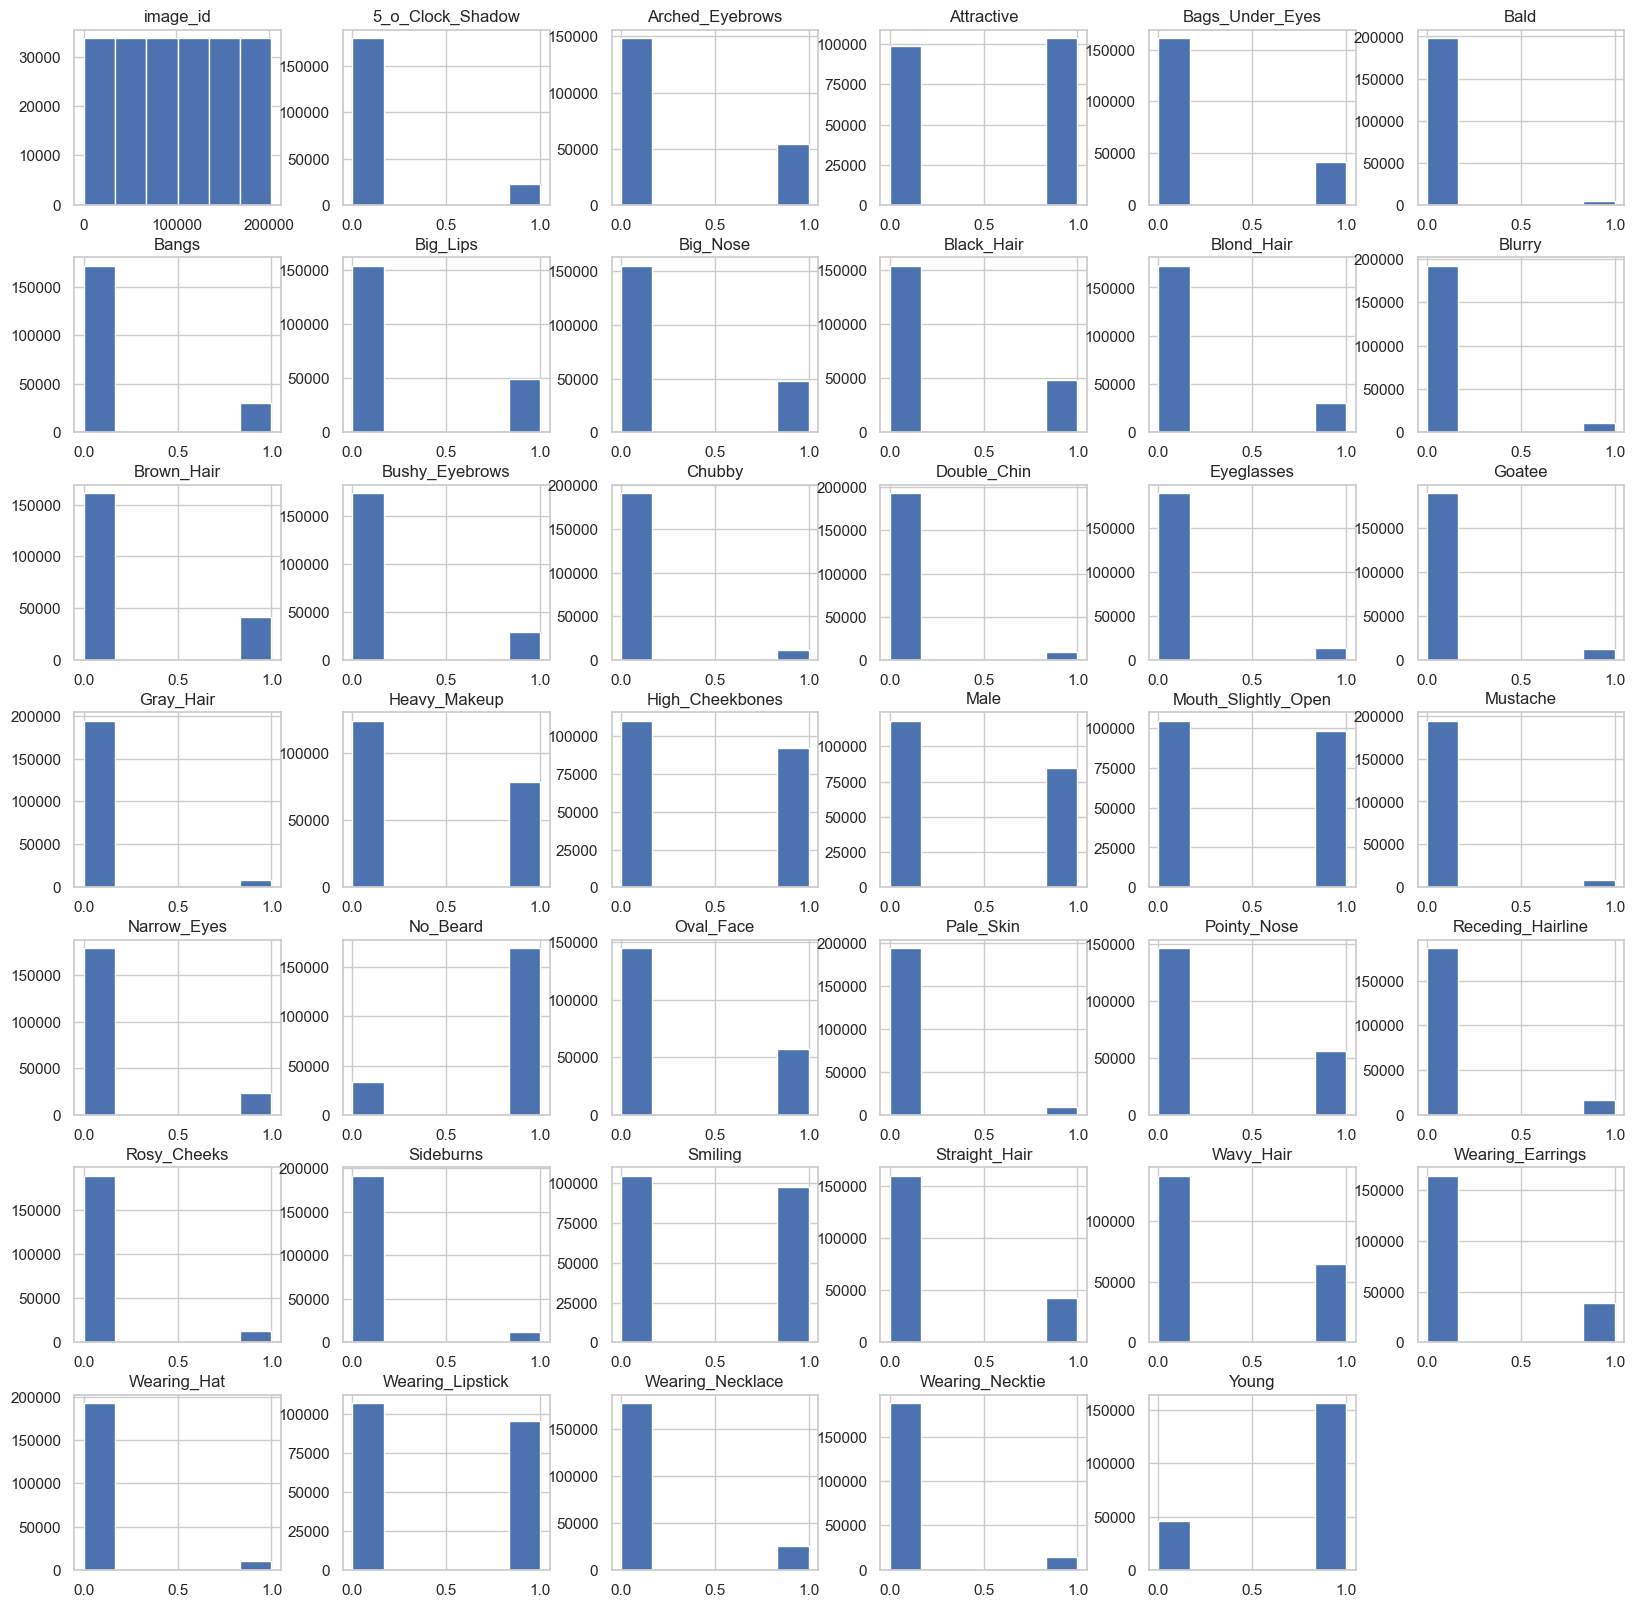

In [25]:
data.hist(figsize = (20, 20), bins = 6, legend = False);

On first glance, this does not look too helpful but there are some interesting facts from it. However, if you look at the histogram of "Young", it shows that a third of the photos only is labelled as "not young" (here the value of 0). This means that the data will be biased towards younger people. This is very similar to the feature "chubby" where even more images have been labelled as "not chubby". Again, this will make predictions unreliable and biased. 

From this, we can select which features are more balanced and will make a good choice for a reliable machine learning's categorisation. For example, the features "Attractive", "Smiling", "Mouth_Slightly_Open", "Male", "High_Cheekbones", "Heavy_Makeup", "Wearing_Lipstick" are more balanced and would therefore be better candidates. Let's have a look at three in more details then as below.

This is indeed a very important representation to select 3 categories where the data is already balanced and should lead to less preparation and more reliable results. 

## Male / female balance

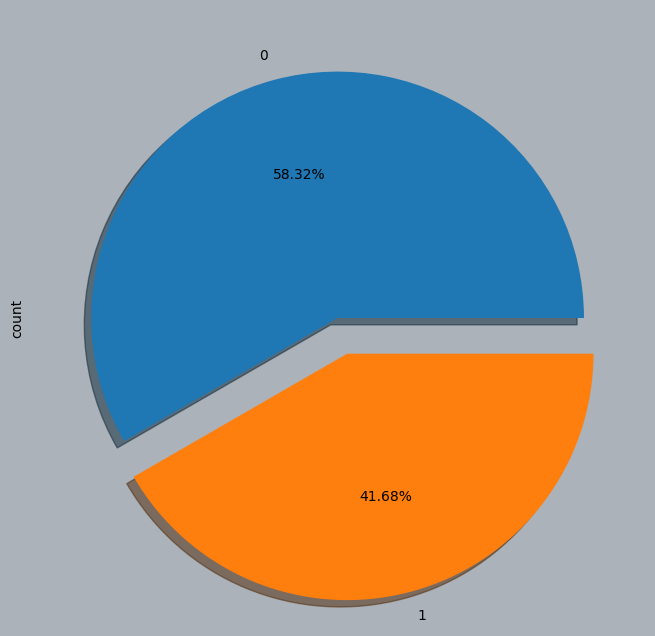

In [4]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
data["Male"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%', shadow = True);

This shows the representation between male and female. We can notice that 58.32% of the images are categorised as being female. Therefore, there is an underrepresentation of the male proportion and I will need to augment the data for the male categories (e.g., adding more photos of men). 

## Attractive / Not Attractive balance

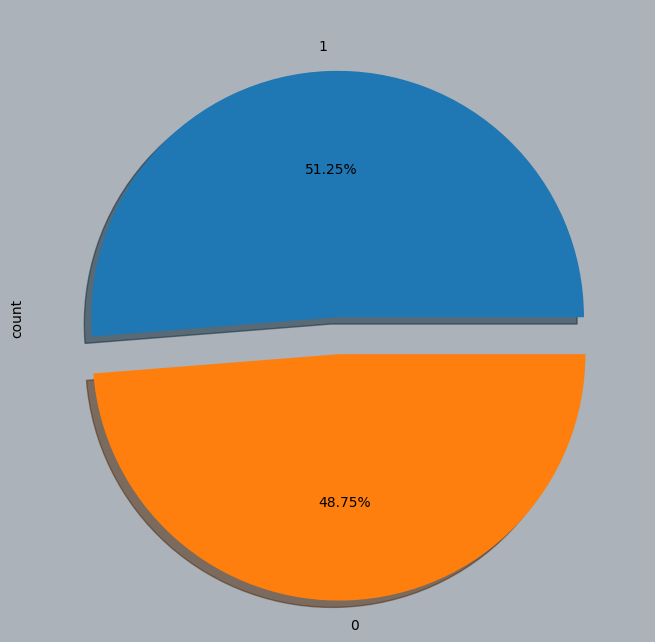

In [14]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
data["Attractive"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%', shadow = True);

This graph shows that nearly half of the people are labelled as "attractive". 48.75% are being labelled as not attractive therefore I will only need to augment this data slightly.

# Smiling / Not Smiling Balance

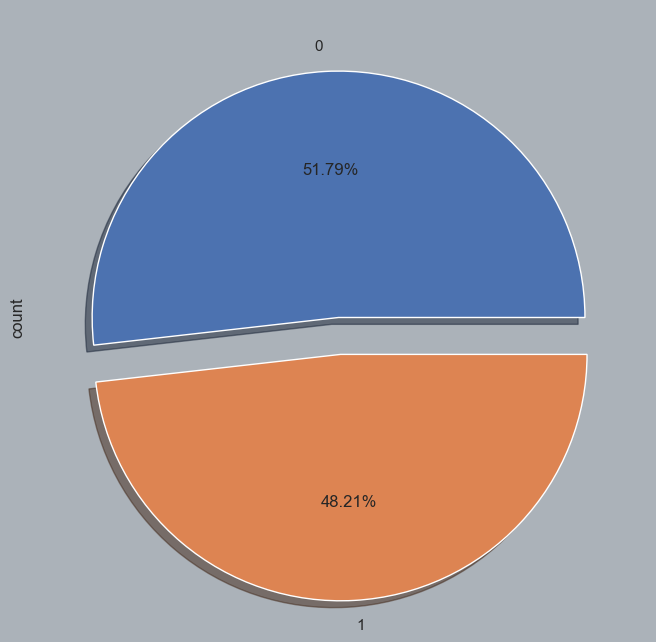

In [26]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
data["Smiling"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%', shadow = True);

This graph shows that again nearly half of the people are labelled as "smiling". 48.21% are being labelled as not smiling therefore I will only need to augment this data slightly.

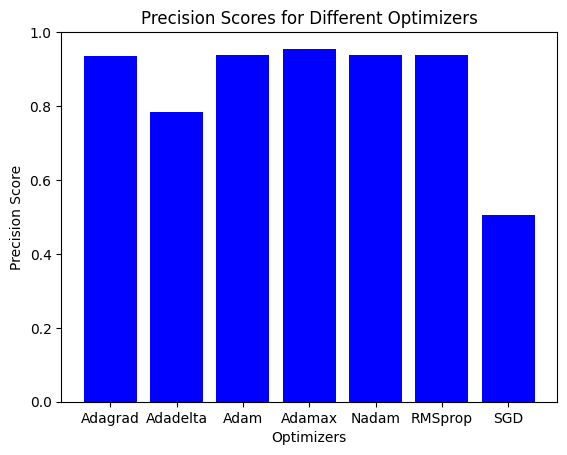

In [1]:
import matplotlib.pyplot as plt

algorithms = ['Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam', 'RMSprop', 'SGD']
precision_scores = [0.935, 0.783, 0.938, 0.955, 0.937, 0.937, 0.504]

plt.bar(algorithms, precision_scores, color='blue')
plt.xlabel('Optimizers')
plt.ylabel('Precision Score')
plt.title('Precision Scores for Different Optimizers')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for precision scores
plt.show()

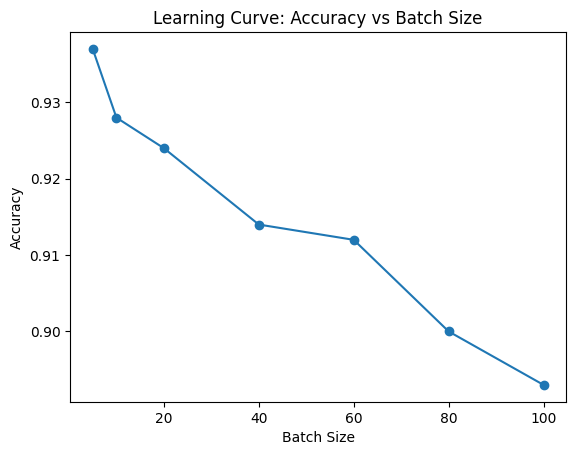

In [2]:
import matplotlib.pyplot as plt

batch_sizes = [5, 10, 20, 40, 60, 80, 100]
accuracies = [0.937, 0.928, 0.924, 0.914, 0.912, 0.900, 0.893]

plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Learning Curve: Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.show()